# Question 1

Consider the maze shown below. The Maze has 16 rows and 24 columns The objective is to find a shortest path from cell $S$ to cell $G$.


![Maze](Maze_Assignment_1.jpg)


The agent can take four actions in each cell: 'RIGHT', 'DOWN', 'UP', 'LEFT'.  

Each cell is represented as $(x,y)$, where $x$ indicates row number and $y$ indicates column number. Action 'UP' takes the agent from cell $(x,y)$ to $(x+1,y)$. Action 'DOWN' takes the agent from cell $(x,y)$ to $(x-1,y)$. Action 'RIGHT' takes the agent from cell $(x,y)$ to $(x,y+1)$. Action 'LEFT' takes the agent from cell $(x,y)$ to $(x,y-1)$. The triplet $(s,a,s')$  indicates that taking action $a$ at state $s$ leads to state $s'$. Actions 'LEFT' or 'RIGHT' cost 10 units for all $(s,a,s')$. Actions 'UP' or 'DOWN' cost 1 unit for all  $(s,a,s')$.  The agent cannot move into cells that are shaded. Assume that the agent knows the boundaries of the maze and has full observability. Consequently, at the bottom (row 0) and top (row 15), the agent will not take actions 'DOWN' and 'UP', respectively; at left (column 0) and right (column 23) columns, the agent will not take 'LEFT' and 'RIGHT' actions, respectively. Similalry, the agent will not take actions that lead to shaded region in the maze.

## **Q1.a: Class Maze(Problem)** [3 Marks]

Write a Maze class to create a model for this problem. You should not use an explicit state space model. The modelling should inherit the abstract class 'Problem' (given below). With the problem formulation, find the shortest path from S to G cell. Propose and implement multiple heuristics (at least two heuristics) for informed search algorithms. 

## **Q1.b: Analysis of the Algorithms** [7 Marks]

1. Solve the above Maze problem using the following algorithms

    a. Breadth-First Search

    b. Depth-First Search with Cycle-Check

    c. Iterative-Deepening Search with Cycle-Check

    d. Uniform-Cost Search

    e. A* Search 

    f. Greedy Best-first Search

    g. Any other variants for search algorithms that are not discussed in the class (bonus/optional question) 

2. Identify the number of nodes generated, number of nodes expanded, maximum frontier size, and path-cost for the above algorithms. 
 
3. Compare the performance of informed search algorithms with proposed heuristics. Identify the best performing heuristic and explain.
 
4. Draw a bar plot comparing the statistics of the algorithms and explain the results. 

Note 1: You must follow the problem formulation discussed in the class. A abstract class for Problem amd Node definition is presented below. The search tree generation should follow the template discussed in the class (i.e., Node class, expand methods, etc.). 

Note 2: If you are borrowing a block of code (for example, helper functions or data structures, etc.) from AIMA4e repository, you have to acknowledge it in the code. 

Note 3: The code should be written in a single jupyter notebook file.

In [1]:
class Problem:
    """The abstract class for a formal problem. A new domain subclasses this,
    overriding `actions` and `results`, and perhaps other methods.
    The default heuristic is 0 and the default action cost is 1 for all states.
    When you create an instance of a subclass, specify `initial`, and `goal` states 
    (or give an `is_goal` method) and perhaps other keyword args for the subclass."""

    def __init__(self, initial=None, goal=None, **kwds): 
        self.__dict__.update(initial=initial, goal=goal, **kwds) 
        
    def actions(self, state):        raise NotImplementedError
    def result(self, state, action): raise NotImplementedError
    def is_goal(self, state):        return state == self.goal
    def action_cost(self, s, a, s1): return 1
    def h(self, node, mode):               return 0
    
    def __str__(self):
        return '{}({!r}, {!r})'.format(
            type(self).__name__, self.initial, self.goal)

In [2]:
# Use the following Node class to generate search tree
import math
class Node:
    "A Node in a search tree."
    def __init__(self, state, parent=None, action=None, path_cost=0):
        self.__dict__.update(state=state, parent=parent, action=action, path_cost=path_cost)

    def __repr__(self): return '<{}>'.format(self.state)
    def __len__(self): return 0 if self.parent is None else (1 + len(self.parent))
    def __lt__(self, other): return self.path_cost < other.path_cost 

    # self defined functions
    def get_state(self): return self.state
    def get_parent(self): return self.parent
    def get_path_cost(self): return self.path_cost


We use a 2D list to represent the maze. Other basic information is defined as constant values or integer pairs.

In [3]:
LAYOUT = [
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
]

RIGHT = 0
UP = 1
LEFT = 2
DOWN = 3

ROW = 16
COL = 24

# directions
# corresponds to RIGHT, UP, LEFT, DOWN
DIRS = [(0,1),(1,0),(0,-1),(-1,0)]

CUTOFF = -1

## Task a: Class Maze(Problem)
The maze class we create inherit the abstract class 'Problem'. We add new function 'expand', which simulates the node expansion process. And we implement 3 heuristic functions: geometric distance, flexible Manhattan distance and standard Manhattan distance.

In [4]:
class Maze(Problem):
    #Your code goes here
    def actions(self, state):
        '''
        Return the possible actions of the current state
        '''
        ret = []
        row, col = state
        for i, dir in enumerate(DIRS):
            add_row, add_col = dir
            row1 = row + add_row # new row
            col1 = col + add_col # new col
            if 0 <= row1 <= ROW - 1 and 0 <= col1 <= COL -1 and not LAYOUT[row1][col1]:
                ret.append(i) 
        return ret
    
    def result(self, state, action):
        '''
        Return the following state
        '''
        row, col = state
        actions = self.actions(state)
        if action not in actions:
            raise Exception('Action is not implemented for this state')
        add_row, add_col = DIRS[action]
        row1 = row + add_row
        col1 = col + add_col
        return (row1, col1)
    
    def action_cost(self, s, a, s1):
        '''
        Return 10 for Left and Right
        Return 1 for Up and Down
        '''
        actions = self.actions(s)
        if a not in actions:
            raise Exception('Action is not implemented for this state')
        if a is RIGHT or a is LEFT:
            return 10
        return 1
    
    def h(self, node, mode):
        '''
        Heuristic function1: Geometric Distance
        Heuristic function2: Manhattan Distance(Flexible): action cost considered.
        Heuristic function3: Manhattan Distance(Standard): action cost ignored.
        '''
        row, col = node.get_state()
        goal_row, goal_col = self.goal
        if mode == 1:
            geo_dist = math.sqrt((10 * (row - goal_row)) ** 2 + (col - goal_col) ** 2)
            return geo_dist
        elif mode == 2: 
            man_dist = 10 * abs(row - goal_row) + abs(col - goal_col)
            return man_dist
        else:
            man_dist = abs(row - goal_row) + abs(col - goal_col)
            return man_dist
    
    # self defined
    def get_initial(self):
        """
        :returns: Initial state of the problem
        """
        return self.initial
    
    def expand(self, node:Node): 
        ret = []
        state = node.get_state()
        for action in self.actions(state):
            child_state = self.result(state, action)
            path_cost = 10
            if action%2:
                path_cost = 1
            ret.append(Node(child_state, parent=node, action=action, path_cost=path_cost+node.get_path_cost()))
        return ret

## Task b: Analysis of the Algorithms
1. Solve the Maze problem using the following algorithms

    a. Breadth-First Search

    b. Depth-First Search with Cycle-Check

    c. Iterative-Deepening Search with Cycle-Check

    d. Uniform-Cost Search

    e. A* Search

    f. Greedy Best-first Search

Besides the required six algorithms, we also implement weighted A* algorithm (the variant of A* algorithm). Our code is as below. <br>
To record the number of nodes generated, expanded and the maximum frontier size, we add some counters into each algorithm.

In [5]:
def bfs(problem: Maze):
    """
    This is a breadth first search algorithm.
 
    :param problem: Maze
    :returns: A solution node or false
    """
    initial = problem.get_initial() # initial state
    node = Node(initial)
    generated = 1
    expanded = 0
    maxFS = 0
    if problem.is_goal(node.get_state()):
        return node, generated, expanded, maxFS, node.get_path_cost()
    
    # FIFO list
    frontier = [node] 
    maxFS += 1
    reached:set = {initial}

    while frontier:
        node = frontier.pop(0)
        expanded += 1
        for child in problem.expand(node):
            # child state
            c_state = child.get_state()
            # return when reached (not expanded)
            if problem.is_goal(c_state):
                return child, generated, expanded, maxFS, child.get_path_cost()
            if c_state not in reached:
                generated += 1
                reached.add(c_state)
                frontier.append(child)
        if len(frontier) > maxFS:
            maxFS = len(frontier)
    
    return False


def check_is_cycle(node: Node):
    """
    This is a function for cycle checking (used by DFS)
 
    :param node: Node
    :returns: True or false
    """
    route = set()
    while node:
        if node.get_state() in route:
            return True
        route.add(node.get_state())
        node = node.get_parent()
    return False


def dfs(problem: Maze):
    """
    This is a depth first tree search algorithm with cycle check.
 
    :param problem: Maze
    :returns: A solution node or false
    """
    initial = problem.get_initial()
    node = Node(initial)
    generated = 1
    expanded = 0
    maxFS = 0
    if problem.is_goal(node.get_state()):
        return node, generated, expanded, maxFS, node.get_path_cost()
    
    # LIFO stack
    frontier = [node]
    maxFS += 1
    while frontier:
        node = frontier.pop()
        expanded += 1
        if problem.is_goal(node.get_state()):
            return node, generated, expanded, maxFS, child.get_path_cost()
        # check cycle
        if not check_is_cycle(node):
            for child in problem.expand(node):
                if problem.is_goal(child.get_state()):
                    return child, generated, expanded, maxFS, child.get_path_cost()
                generated += 1
                frontier.append(child)
        if len(frontier) > maxFS:
            maxFS = len(frontier)
    return False


def dls(problem:Maze, l:int, generated, expanded, maxFS):
    """
    This is a depth limited search algorithm with cycle check.
 
    :param problem: Maze
    :param l: int
    :returns: A solution node, or false, or cutoff (indicate result may be in deeper level)
    """
    initial = problem.get_initial()
    node = Node(initial)
    # LIFO stack
    frontier = [node]
    result = False

    while frontier:
        node = frontier.pop()
        expanded += 1
        if problem.is_goal(node.get_state()): 
            return node, generated, expanded, maxFS, node.get_path_cost()
        if len(node) > l:
            result = CUTOFF
        # check cycle
        elif not check_is_cycle(node):
            for child in problem.expand(node):
                generated += 1
                frontier.append(child)
        if len(frontier) > maxFS:
            maxFS = len(frontier)
    return result, generated, expanded, maxFS, -2


def ids(problem:Maze):
    """
    This is an iterative depth search algorithm with cycle check.
 
    :param problem: Maze
    :returns: A solution node or false
    """
    depth = 0
    generated = 1
    expanded = 0
    maxFS = 1
    while True:
        result, generated, expanded, maxFS, path_cost = dls(problem, depth, generated, expanded, maxFS)
        if result != CUTOFF:
            return result, generated, expanded, maxFS, path_cost
        depth += 1


def best_first_search(problem:Maze, f, mode=2):
    """
    This is a uniform cost search algorithm.
 
    :param problem: Maze
    :param f: function
    :returns: A solution node or false
    """
    initial = problem.get_initial()
    node = Node(initial)
    generated = 1
    expanded = 0
    maxFS = 0
    if problem.is_goal(node.get_state()):
        return node, generated, expanded, maxFS, node.get_path_cost()
    # priority queue, ordered by path cost
    frontier = [(f(problem, node, mode),node)]
    reached = {initial: node}
    maxFS += 1

    while frontier:
        node = frontier.pop(0)[1]
        expanded += 1
        # return when expanded
        if problem.is_goal(node.get_state()):
            return node, generated, expanded, maxFS, node.get_path_cost()
        for child in problem.expand(node):
            c_state = child.get_state()
            if c_state not in reached or child.get_path_cost() < reached[c_state].get_path_cost():
                generated += 1
                reached[c_state] = child
                frontier.append((f(problem, child, mode), child))
                frontier.sort()
        if maxFS < len(frontier):
            maxFS = len(frontier)
               
    return False


def ucs(problem:Maze):
    """
    This is a uniform cost search algorithm.
 
    :param problem: Maze
    :returns: A solution node or false
    """
    def f(problem:Maze, node:Node, mode):
        return node.get_path_cost()
    return best_first_search(problem, f)


def a_star(problem:Maze, mode):
    """
    This is a A* search algorithm.
 
    :param problem: Maze
    :returns: A solution node or false
    """
    def f(problem:Maze, node:Node, mode):
        return problem.h(node, mode)+node.get_path_cost()
    return best_first_search(problem, f, mode)


def gbfs(problem:Maze, mode):
    """
    This is a greedy best first search algorithm.
 
    :param problem: Maze
    :returns: A solution node or false
    """
    def f(problem:Maze, node:Node, mode):
        return problem.h(node, mode)
    return best_first_search(problem, f, mode)


def w_a_star(problem:Maze, mode):
    """
    This is a weighted A* search algorithm.
 
    :param problem: Maze
    :returns: A solution node or false
    """
    def f(problem:Maze, node:Node, mode):
        W = 1.2
        return problem.h(node, mode)+node.get_path_cost()*W
    return best_first_search(problem, f, mode)

2. Identify the number of nodes generated, number of nodes expanded, maximum frontier size, and path-cost for the above algorithms.

With the added counter, we can easily identify the number of nodes generated, number of nodes expanded, and maximum frontier size. The path cost is returned by 'Node.get_path_cost'.

In [21]:
initial = (8,10)
goal = (11,9)
maze = Maze(initial, goal)
    
selected_mode = 2

bfs_res = bfs(maze)
dfs_res = dfs(maze)
ids_res = ids(maze)
ucs_res = ucs(maze)
a_res = a_star(maze, selected_mode)
gbfs_res = gbfs(maze, selected_mode)
w_a_res = w_a_star(maze, selected_mode)

lables = ['Generated','Expanded','MaxFS', 'PathCost']
print(f'{"":15}',end='')
for i in range(4):
    print(f'{lables[i]:15}', end='')
print()

algo_names = ['BFS','DFS','IDS','UCS','A_STAR','GBFS','W_A_STAR']
algo_res = [ bfs_res, dfs_res, ids_res, ucs_res, a_res, gbfs_res, w_a_res]

for i in range(7):
    print(f'{algo_names[i]:15}', end='')
    for j in range(1,5):
        print(f'{algo_res[i][j]:<15}', end='')
    print()

               Generated      Expanded       MaxFS          PathCost       
BFS            194            165            31             39             
DFS            554            287            270            321            
IDS            160286         160287         30             39             
UCS            123            91             34             39             
A_STAR         90             66             25             39             
GBFS           189            153            39             61             
W_A_STAR       87             62             26             39             


3. Compare the performance of informed search algorithms with proposed heuristics. Identify the best performing heuristic and explain.

For this task, we chose two types of heuristics:
    
    1. Heuristic function1: Geometric Distance
    
    2. Heuristic function2: Manhattan Distance (Flexible): action cost considered
    
    3. Heuristic function2: Manhattan Distance (Standard): action cost ignored
    
We draw a bar plot with matplotlib to compare the three heuristic funtions.

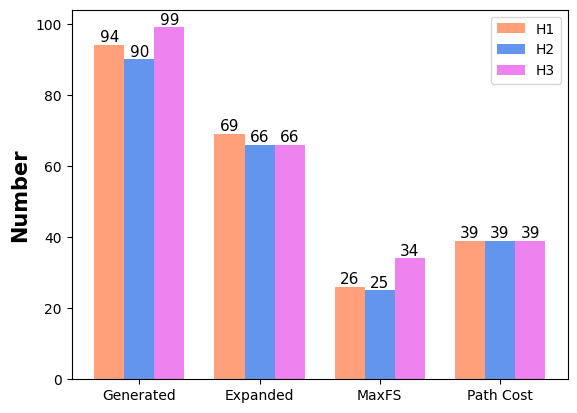

In [6]:
import matplotlib.pyplot as plt


if __name__ == '__main__':
    initial = (8,10)
    goal = (11,9)
    maze = Maze(initial, goal)
    
    # mode = 1: H1(Geometric Distance)
    res1 = a_star(maze, 1)
    # mode = 2: H2(Manhattan Distance, flexible version)
    res2 = a_star(maze, 2)
    # mode = 2: H3(Manhattan Distance, standard version)
    res3 = a_star(maze, 3)
    
    # set width of bar
    barWidth = 0.25

    # set height of bar
    H1 = [res1[i] for i in range(1,5)]
    H2 = [res2[i] for i in range(1,5)]
    H3 = [res3[i] for i in range(1,5)]
    
    x_name = ['Generated', 'Expanded', 'MaxFS', 'Path Cost']

    # Set position of bar on X axis
    bar1 = [0, 1, 2, 3]
    bar2 = [n + barWidth for n in bar1]
    bar3 = [n + barWidth for n in bar2]


    # Make the plot
    plt.bar(bar1, H1, color ='lightsalmon', width = barWidth, label ='H1')
    plt.bar(bar2, H2, color ='cornflowerblue', width = barWidth, label ='H2')
    plt.bar(bar3, H3, color ='violet', width = barWidth, label ='H3')

    # Adding Xticks
    plt.ylabel('Number', fontweight ='bold', fontsize = 15)
    plt.xticks([r + barWidth for r in range(len(H3))], x_name)
    
    # Add text
    for(a, b) in zip(bar1, H1):
        plt.text(a, b, '%.0f'%b, ha = 'center', va = 'bottom', fontsize = 11)
    for(a, b) in zip(bar2, H2):
        plt.text(a, b, '%.0f'%b, ha = 'center', va = 'bottom', fontsize = 11)
    for(a, b) in zip(bar3, H3):
        plt.text(a, b, '%.0f'%b, ha = 'center', va = 'bottom', fontsize = 11)

    plt.legend()
    plt.show()



We can see from the plot that H2 is better than H1 and H3. 

It generates and expands fewer nodes, meaning that it's less time-consuming. Also, the max frontier size is less, which represents lower memory complexity. 

The reason is that in this case, H2, Manhattan distance, is closer to the exact path cost from current node to goal node than H1 and H3. To be specific, the agent can only move in four directions instead of moving straight forward, and costs of directions are different. Only H2 captures these two characteristics at the same time. Therefore, it simulates to the real cost most closely.


4. Draw a bar plot comparing the statistics of the algorithms and explain the results.

As H2 is the best, we use H2 for this task.<br>
We draw a barplot the display the results of each algorithm. They vary a lot. Take IDS for instance, the total nodes generated and expanded exceed 160,000, which is tremendous. <br>
To show such variable data on the same graph, we break the y axis.

In [7]:
initial = (8,10)
goal = (11,9)
maze = Maze(initial, goal)
    
selected_mode = 2

bfs_res = bfs(maze)
dfs_res = dfs(maze)
ids_res = ids(maze)
ucs_res = ucs(maze)
a_res = a_star(maze, selected_mode)
gbfs_res = gbfs(maze, selected_mode)
w_a_res = w_a_star(maze, selected_mode)

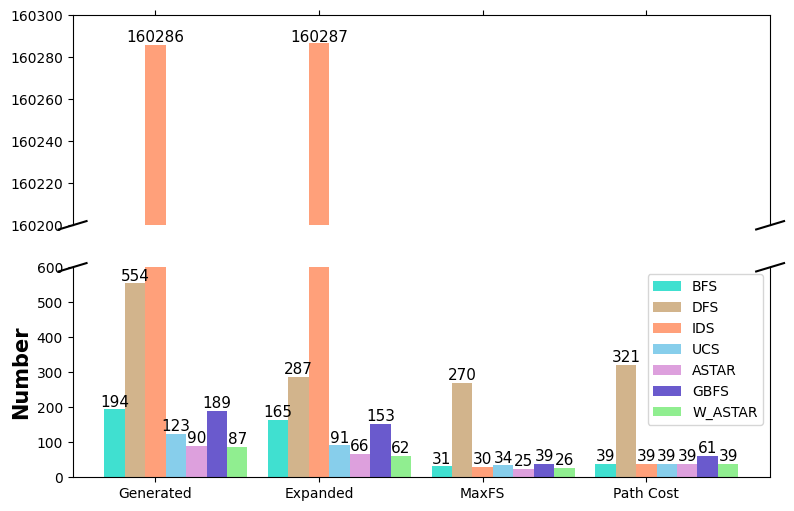

In [9]:
# set width of bar
barWidth = 0.25
    
f, (ax, ax2) = plt.subplots(2, 1, sharex=True, figsize=(9, 6))
# set height of bar
BFS = [bfs_res[i] for i in range(1,5)]
DFS = [dfs_res[i] for i in range(1,5)]
IDS = [ids_res[i] for i in range(1,5)]
UCS = [ucs_res[i] for i in range(1,5)]
ASTAR = [a_res[i] for i in range(1,5)]
GBFS = [gbfs_res[i] for i in range(1,5)]
W_ASTAR = [w_a_res[i] for i in range(1,5)]
x_name = ['Generated', 'Expanded', 'MaxFS', 'Path Cost']

# Set position of bar on X axis
bar1 = [0, 2, 4, 6]
bar2 = [n + barWidth for n in bar1]
bar3 = [n + barWidth for n in bar2]
bar4 = [n + barWidth for n in bar3]
bar5 = [n + barWidth for n in bar4]
bar6 = [n + barWidth for n in bar5]
bar7 = [n + barWidth for n in bar6]

# Make the plot
ax.bar(bar1, BFS, color ='turquoise', width = barWidth, label ='BFS')
ax.bar(bar2, DFS, color ='tan', width = barWidth, label ='DFS')
ax.bar(bar3, IDS, color ='lightsalmon', width = barWidth, label ='IDS')
ax.bar(bar4, UCS, color ='skyblue', width = barWidth, label ='UCS')
ax.bar(bar5, ASTAR, color ='plum', width = barWidth, label ='ASTAR')
ax.bar(bar6, GBFS, color ='slateblue', width = barWidth, label ='GBFS')
ax.bar(bar7, W_ASTAR, color ='lightgreen', width = barWidth, label ='W_ASTAR')

ax2.bar(bar1, BFS, color ='turquoise', width = barWidth, label ='BFS')
ax2.bar(bar2, DFS, color ='tan', width = barWidth, label ='DFS')
ax2.bar(bar3, IDS, color ='lightsalmon', width = barWidth, label ='IDS')
ax2.bar(bar4, UCS, color ='skyblue', width = barWidth, label ='UCS')
ax2.bar(bar5, ASTAR, color ='plum', width = barWidth, label ='ASTAR')
ax2.bar(bar6, GBFS, color ='slateblue', width = barWidth, label ='GBFS')
ax2.bar(bar7, W_ASTAR, color ='lightgreen', width = barWidth, label ='W_ASTAR')

ax.set_ylim(160200, 160300)  # outliers only
ax2.set_ylim(0, 600)  # most of the data

# Adding Xticks
plt.ylabel('Number', fontweight ='bold', fontsize = 15)
plt.xticks([r + 2*barWidth for r in bar1], x_name)

# Add text
for(a, b) in zip(bar1, BFS):
    plt.text(a, b, '%.0f'%b, ha = 'center', va = 'bottom', fontsize = 11)
for(a, b) in zip(bar2, DFS):
    plt.text(a, b, '%.0f'%b, ha = 'center', va = 'bottom', fontsize = 11)

# Add text on IDS. This case is special, as the number is stremely big and we need to subtract 159050 to make it show
# on the same graph
for(a, b) in zip(bar3, IDS):
    if b > 160000:
        plt.text(a, b-159050, '%.0f'%b, ha = 'center', va = 'bottom', fontsize = 11)
    else:
        plt.text(a, b, '%.0f'%b, ha = 'center', va = 'bottom', fontsize = 11)
for(a, b) in zip(bar4, UCS):
    plt.text(a, b, '%.0f'%b, ha = 'center', va = 'bottom', fontsize = 11) 
for(a, b) in zip(bar5, ASTAR):
    plt.text(a, b, '%.0f'%b, ha = 'center', va = 'bottom', fontsize = 11)
for(a, b) in zip(bar6, GBFS):
    plt.text(a, b, '%.0f'%b, ha = 'center', va = 'bottom', fontsize = 11)
for(a, b) in zip(bar7, W_ASTAR):
    plt.text(a, b, '%.0f'%b, ha = 'center', va = 'bottom', fontsize = 11)

ax.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax.xaxis.tick_top()
ax2.xaxis.tick_bottom()
d = .02

kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
ax.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal

plt.legend()
plt.show()

We compare these algorithms in four aspects: the number of nodes generated, expanded, the maximum frontier size and total path cost.<br>
 
Node generation and expansion is a measure of time consuming, and maximum frontier size measures space complexity. Total path cost decides whether the algorithm is optimal.<br>
 
In this Maze problem, weighted A* search is the best algorithm. It generated and expanded relatively fewest nodes and its maximum frontier size was second smallest. The second best algorithm is A* search.<br>
 
BFS performed relatively well in both time and space. Also, it found the optimal path. <br>
 
DFS performed poorly in both time and space. It took the second longest time to find the path and it used the largest frontier. The path it found was far from optimal. We can conclude that DFS is not suitable for this kind of Maze problem. We can say the same for GBFS, as it also showed bad performance.<br>
 
Then let's take a look at IDS. It's clear that the number of nodes IDS generated and expanded is the greatest, which indicates that IDS took the longest time. This is because for every iteration, IDS generated and expanded the same nodes that had already been generated previously again. It did a lot of repeat work. Therefore, from the perspective of time, IDS performed the worst. However, it's also obvious that IDS maintained the least maximum frontier size, meaning it consumed the least space. So from the perspective of space, IDS performs best. IDS can find the optimal path.<br>
 
UCS took relatively short time but relatively large space. It successfully found the optimal path. Based on the result of IDS and UCS, it seems that there is a trade-off between time complexity and space complexity.